In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statistics
import math
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from  scipy.io import arff
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

# Using Runtime Dataset 

In [2]:
data_run = pd.read_csv("sgemm_product.csv",index_col=False)
data_run["runavg (ms)"] = (data_run["Run1 (ms)"]+data_run["Run2 (ms)"]+data_run["Run3 (ms)"]+data_run["Run4 (ms)"])/4
data_run["log_run"] = np.where(data_run['runavg (ms)']>statistics.median(data_run["runavg (ms)"]), 1.0, 0.0)
data_run=data_run.drop(["runavg (ms)", "Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1)
data_run

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,log_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,0.0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,0.0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,0.0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,0.0


## Splitting the data and normalisation

In [3]:
X= data_run.iloc[:,:14]
Y=data_run.iloc[:,-1]
X_c= X
Y_c= Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
scaler = StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(X_test)

## Applying Support Vector Machines

In [5]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_train)
#print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

In [7]:
print('Accuracy:',metrics.accuracy_score(y_train,y_pred))

Accuracy: 0.961341059602649


In [8]:
y_pred=svc.predict(x_test)
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.960733995584989


# Applying SVM with various Kernels

## Linear

In [9]:
svc=SVC(kernel = 'linear')
svc.fit(x_train,y_train)
y_pred_test=svc.predict(x_test)
y_pred_train=svc.predict(x_train)

In [10]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:', metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.831025307473983
Accuracy Score for Test data: 0.8336506622516556


## Rbf or gaussian

In [11]:
svc=SVC(kernel = 'rbf')
svc.fit(x_train,y_train)
y_pred_test=svc.predict(x_test)
y_pred_train=svc.predict(x_train)

In [12]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:', metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.961341059602649
Accuracy Score for Test data: 0.960733995584989


## Polynomial

In [13]:
svc=SVC(kernel = 'poly')
svc.fit(x_train,y_train)
y_pred_test=svc.predict(x_test)
y_pred_train=svc.predict(x_train)

In [14]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:', metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.9088753547776727
Accuracy Score for Test data: 0.9108029801324503


# Chosen Dataset on Diabetic Retinopathy

In [2]:
data_med = arff.loadarff('messidor_features.arff')
data_med = pd.DataFrame(data_med[0])
data_med.shape
#data = np.array(dataset['data'])

(1151, 20)

In [3]:
data_med.rename(columns={'0': 'QUALITY','1':'SCREENING','2':'MA1','3':'MA2','4':'MA3','5':'MA4','6':'MA5','7':'MA6','8':'EX1','9':'EX2','10':'EX3','11':'EX4','12':'EX5','13':'EX6','14':'EX7','15':'EX8','16':'DISTANCE','17':'DIAMETER','18':'AM_FM_CLASS'}, index={'ONE': 'one'}, inplace=True)
data_med['RESULT']=0
for i in range(0,data_med.shape[0]):
    if (data_med['Class'][i]==b'\x30'):
        data_med['RESULT'][i]=0
    elif(data_med['Class'][i]==b'\x31'):
        data_med['RESULT'][i]=1
    else:
        data_med['RESULT'][i]='NAN'

In [4]:
data_med.head()

,QUALITY,SCREENING,MA1,MA2,MA3,MA4,MA5,MA6,EX1,EX2,...,EX4,EX5,EX6,EX7,EX8,DISTANCE,DIAMETER,AM_FM_CLASS,Class,RESULT
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,...,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0',0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,...,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0',0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,...,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1',1
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,...,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0',0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1',1


In [5]:
import gc
gc.collect()

31

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


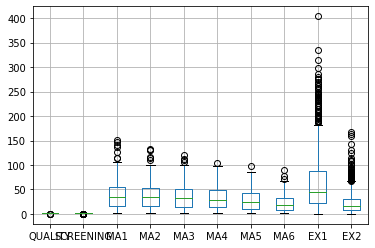

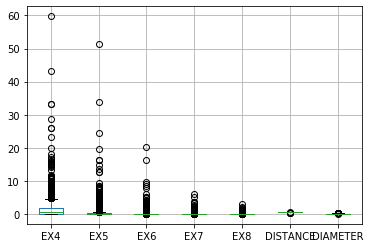

In [116]:
data_med_box1=data_med.iloc[:,0:10]
print(data_med_box1.plot.box(grid='True'))
data_med_box2=data_med.iloc[:,11:18]
print(data_med_box2.plot.box(grid='True'))
#sns.boxplot(x=['QUALITY','SCREENING'], data=data_med)

In [11]:
data_med.isnull().sum()

QUALITY        0
SCREENING      0
MA1            0
MA2            0
MA3            0
MA4            0
MA5            0
MA6            0
EX1            0
EX2            0
EX3            0
EX4            0
EX5            0
EX6            0
EX7            0
EX8            0
DISTANCE       0
DIAMETER       0
AM_FM_CLASS    0
Class          0
RESULT         0
dtype: int64

In [12]:
X2=data_med.drop(['RESULT','Class'],axis=1)
Y2=data_med['RESULT']

## Splitting the data and normalisation

In [13]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.30,random_state=23)
scaler = StandardScaler()
x_train2=scaler.fit_transform(X_train2)
x_test2=scaler.fit_transform(X_test2)

## Applying SVM

In [9]:
svc=SVC()
svc.fit(x_train2,y_train2)
y_pred_train=svc.predict(x_train2)
y_pred_test=svc.predict(x_test2)

In [10]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test))

Accuracy Score for Train data: 0.7515527950310559
Accuracy Score for Test data: 0.6445086705202312


## Using different Kernels

## Linear

In [11]:
svc=SVC(kernel = 'linear')
svc.fit(x_train2,y_train2)
y_pred_test=svc.predict(x_test2)
y_pred_train=svc.predict(x_train2)

In [12]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train))
print('Accuracy Score for Test data:', metrics.accuracy_score(y_test2,y_pred_test))

Accuracy Score for Train data: 0.7552795031055901
Accuracy Score for Test data: 0.6936416184971098


## Rbf or gaussian

In [13]:
svc=SVC(kernel = 'rbf')
svc.fit(x_train2,y_train2)
y_pred_test=svc.predict(x_test2)
y_pred_train=svc.predict(x_train2)

In [14]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train))
print('Accuracy Score for Test data:', metrics.accuracy_score(y_test2,y_pred_test))

Accuracy Score for Train data: 0.7515527950310559
Accuracy Score for Test data: 0.6445086705202312


## Polynomial

In [15]:
svc=SVC(kernel = 'poly')
svc.fit(x_train2,y_train2)
y_pred_test=svc.predict(x_test2)
y_pred_train=svc.predict(x_train2)

In [16]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train))
print('Accuracy Score for Test data:', metrics.accuracy_score(y_test2,y_pred_test))

Accuracy Score for Train data: 0.698136645962733
Accuracy Score for Test data: 0.5578034682080925


# Decision Trees

## Dataset- Runtime

In [72]:
X= data_run.iloc[:,:14]
Y=data_run.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
scaler = StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(X_test)

In [94]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

In [95]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:', metrics.accuracy_score(y_test,y_pred_test))
original_accuracy=metrics.accuracy_score(y_test,y_pred_test)

Accuracy Score for Train data: 1.0
Accuracy Score for Test data: 0.9916804635761589


In [110]:
train_acc=[]
test_acc=[]
for i in range(1,25):
    clf = DecisionTreeClassifier(max_depth=i,criterion='entropy')
    clf = clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    train_acc.append(metrics.accuracy_score(y_train,y_pred_train))
    test_acc.append(metrics.accuracy_score(y_test,y_pred_test))

In [111]:
for i in range(len(test_acc)):
    if (test_acc[i]>original_accuracy):
        print (i+1,test_acc[i])
        break

18 0.9917632450331125


Text(0.5, 1.0, 'Depth Vs Accuracy\nOriginal accuracy:0.99168')

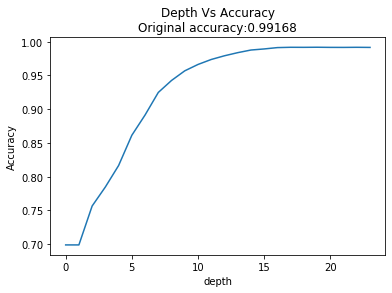

In [123]:
plt.plot(test_acc)
plt.ylabel('Accuracy')
plt.xlabel('depth')
plt.title('Depth Vs Accuracy'+'\n'+'Original accuracy:{}'.format(round(original_accuracy,5)))

In [112]:
train_acc=[]
test_acc=[]
for i in range(1,25):
    clf = DecisionTreeClassifier(max_depth=i,criterion='gini')
    clf = clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    train_acc.append(metrics.accuracy_score(y_train,y_pred_train))
    test_acc.append(metrics.accuracy_score(y_test,y_pred_test))

[0.6989100441501104,
 0.6989100441501104,
 0.75655353200883,
 0.784782008830022,
 0.8165424944812362,
 0.8613962472406181,
 0.891432119205298,
 0.924848233995585,
 0.9426186534216335,
 0.9568846578366446,
 0.9663217439293599,
 0.9737030905077263,
 0.9791942604856512,
 0.9838024282560707,
 0.9877069536423841,
 0.9893073951434879,
 0.9913079470198676,
 0.9917632450331125,
 0.9916942604856512,
 0.9918322295805739,
 0.9916390728476822,
 0.9915976821192053,
 0.9917494481236203,
 0.9915838852097131]

In [124]:
for i in range(len(test_acc)):
    if (test_acc[i]>original_accuracy):
        print (i+1,test_acc[i])
        break

18 0.9917632450331125


Text(0.5, 1.0, 'Depth Vs Accuracy\nOriginal accuracy:0.99168')

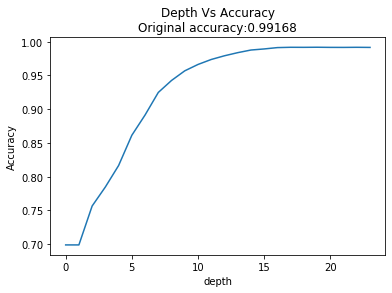

In [125]:
plt.plot(test_acc)
plt.ylabel('Accuracy')
plt.xlabel('depth')
plt.title('Depth Vs Accuracy'+'\n'+'Original accuracy:{}'.format(round(original_accuracy,5)))

## Dataset- Diabetic Retinopathy

In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.30,random_state=23)
scaler = StandardScaler()
x_train2=scaler.fit_transform(X_train2)
x_test2=scaler.fit_transform(X_test2)

In [90]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train2,y_train2)
y_pred_train2 = clf.predict(x_train2)
y_pred_test2 = clf.predict(x_test2)

In [91]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:', metrics.accuracy_score(y_test2,y_pred_test2))
original_accuracy2=metrics.accuracy_score(y_test2,y_pred_test2)

Accuracy Score for Train data: 1.0
Accuracy Score for Test data: 0.5867052023121387


In [92]:
train_acc2=[]
test_acc2=[]
for i in range(1,30):
    clf = DecisionTreeClassifier(max_depth=i,criterion='entropy')
    clf = clf.fit(x_train2,y_train2)
    y_pred_train2 = clf.predict(x_train2)
    y_pred_test2 = clf.predict(x_test2)
    train_acc2.append(metrics.accuracy_score(y_train2,y_pred_train2))
    test_acc2.append(metrics.accuracy_score(y_test2,y_pred_test2))

In [93]:
for i in range(len(test_acc2)):
    if (test_acc2[i]>original_accuracy2):
        print (i+1,test_acc2[i])
        break

12 0.5895953757225434


Text(0.5, 1.0, 'Depth Vs Accuracy\nOriginal accuracy:0.58671')

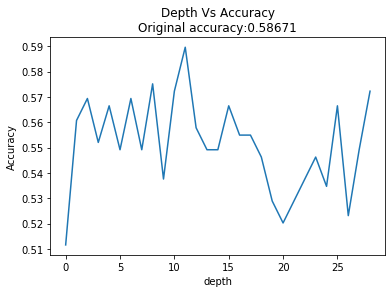

In [94]:
plt.plot(test_acc2)
plt.ylabel('Accuracy')
plt.xlabel('depth')
plt.title('Depth Vs Accuracy'+'\n'+'Original accuracy:{}'.format(round(original_accuracy2,5)))

In [95]:
test_acc2

[0.5115606936416185,
 0.5606936416184971,
 0.569364161849711,
 0.5520231213872833,
 0.5664739884393064,
 0.5491329479768786,
 0.569364161849711,
 0.5491329479768786,
 0.5751445086705202,
 0.5375722543352601,
 0.5722543352601156,
 0.5895953757225434,
 0.5578034682080925,
 0.5491329479768786,
 0.5491329479768786,
 0.5664739884393064,
 0.5549132947976878,
 0.5549132947976878,
 0.546242774566474,
 0.5289017341040463,
 0.5202312138728323,
 0.5289017341040463,
 0.5375722543352601,
 0.546242774566474,
 0.5346820809248555,
 0.5664739884393064,
 0.523121387283237,
 0.5491329479768786,
 0.5722543352601156]

In [96]:
train_acc2=[]
test_acc2=[]
for i in range(1,30):
    clf = DecisionTreeClassifier(max_depth=i,criterion='gini')
    clf = clf.fit(x_train2,y_train2)
    y_pred_train2 = clf.predict(x_train2)
    y_pred_test2 = clf.predict(x_test2)
    train_acc2.append(metrics.accuracy_score(y_train2,y_pred_train2))
    test_acc2.append(metrics.accuracy_score(y_test2,y_pred_test2))

In [97]:
for i in range(len(test_acc2)):
    if (test_acc2[i]>original_accuracy2):
        print (i+1,test_acc2[i])
        break

10 0.5953757225433526


Text(0.5, 1.0, 'Depth Vs Accuracy\nOriginal accuracy:0.58671')

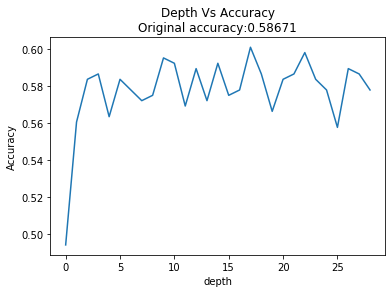

In [98]:
plt.plot(test_acc2)
plt.ylabel('Accuracy')
plt.xlabel('depth')
plt.title('Depth Vs Accuracy'+'\n'+'Original accuracy:{}'.format(round(original_accuracy2,5)))

# Boosting with Decision Trees

## Dataset- Runtime

In [118]:
clfb = AdaBoostClassifier(DecisionTreeClassifier())
cl_b= clfb.fit(x_train,y_train)
y_pred_train = cl_b.predict(x_train)
y_pred_test = cl_b.predict(x_test)

In [119]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:', metrics.accuracy_score(y_test,y_pred_test))
original_accuracy=metrics.accuracy_score(y_test,y_pred_test)

Accuracy Score for Train data: 1.0
Accuracy Score for Test data: 0.9917218543046358


In [120]:
train_acc=[]
test_acc=[]
for i in range(1,30):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i,criterion='entropy'))
    clf = clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    train_acc.append(metrics.accuracy_score(y_train,y_pred_train))
    test_acc.append(metrics.accuracy_score(y_test,y_pred_test))

In [121]:
for i in range(len(test_acc)):
    if (test_acc[i]>original_accuracy):
        print (i+1,test_acc[i])
        break

15 0.9919977924944813


Text(0.5, 1.0, 'Depth Vs Accuracy\nOriginal accuracy:0.99172')

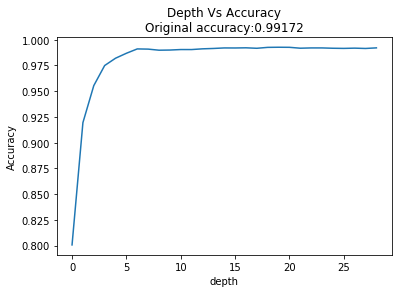

In [122]:
plt.plot(test_acc)
plt.ylabel('Accuracy')
plt.xlabel('depth')
plt.title('Depth Vs Accuracy'+'\n'+'Original accuracy:{}'.format(round(original_accuracy,5)))

In [123]:
train_acc=[]
test_acc=[]
for i in range(1,30):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i,criterion='gini'))
    clf = clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    train_acc.append(metrics.accuracy_score(y_train,y_pred_train))
    test_acc.append(metrics.accuracy_score(y_test,y_pred_test))

In [124]:
for i in range(len(test_acc)):
    if (test_acc[i]>original_accuracy):
        print (i+1,test_acc[i])
        break

15 0.9920115894039735


Text(0.5, 1.0, 'Depth Vs Accuracy\nOriginal accuracy:0.99172')

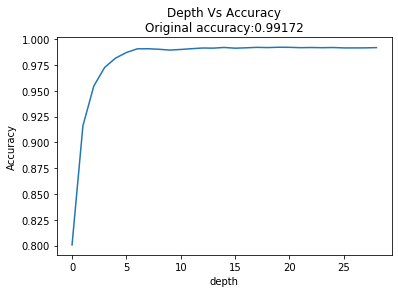

In [125]:
plt.plot(test_acc)
plt.ylabel('Accuracy')
plt.xlabel('depth')
plt.title('Depth Vs Accuracy'+'\n'+'Original accuracy:{}'.format(round(original_accuracy,5)))

## Dataset- Diabetic Retinopathy

In [109]:
clfb = AdaBoostClassifier(DecisionTreeClassifier())
cl_b= clfb.fit(x_train2,y_train2)
y_pred_train2 = cl_b.predict(x_train2)
y_pred_test2 = cl_b.predict(x_test2)

In [110]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:', metrics.accuracy_score(y_test2,y_pred_test2))
original_accuracy2=metrics.accuracy_score(y_test2,y_pred_test2)

Accuracy Score for Train data: 1.0
Accuracy Score for Test data: 0.5780346820809249


In [111]:
train_acc2=[]
test_acc2=[]
for i in range(1,30):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i,criterion='entropy'))
    clf = clf.fit(x_train2,y_train2)
    y_pred_train2 = clf.predict(x_train2)
    y_pred_test2 = clf.predict(x_test2)
    train_acc2.append(metrics.accuracy_score(y_train2,y_pred_train2))
    test_acc2.append(metrics.accuracy_score(y_test2,y_pred_test2))

In [112]:
for i in range(len(test_acc2)):
    if (test_acc2[i]>original_accuracy2):
        print (i+1,test_acc2[i])
        break

2 0.6242774566473989


Text(0.5, 1.0, 'Depth Vs Accuracy\nOriginal accuracy:0.57803')

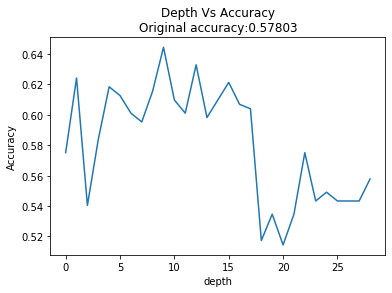

In [113]:
plt.plot(test_acc2)
plt.ylabel('Accuracy')
plt.xlabel('depth')
plt.title('Depth Vs Accuracy'+'\n'+'Original accuracy:{}'.format(round(original_accuracy2,5)))

In [114]:
train_acc2=[]
test_acc2=[]
for i in range(1,30):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i,criterion='gini'))
    clf = clf.fit(x_train2,y_train2)
    y_pred_train2 = clf.predict(x_train2)
    y_pred_test2 = clf.predict(x_test2)
    train_acc2.append(metrics.accuracy_score(y_train2,y_pred_train2))
    test_acc2.append(metrics.accuracy_score(y_test2,y_pred_test2))

In [115]:
for i in range(len(test_acc2)):
    if (test_acc2[i]>original_accuracy2):
        print (i+1,test_acc2[i])
        break

1 0.5895953757225434


Text(0.5, 1.0, 'Depth Vs Accuracy\nOriginal accuracy:0.57803')

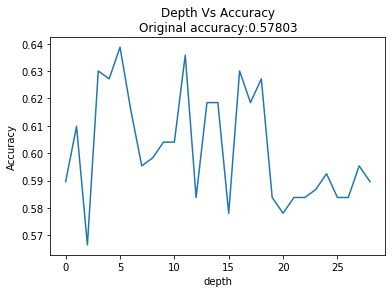

In [116]:
plt.plot(test_acc2)
plt.ylabel('Accuracy')
plt.xlabel('depth')
plt.title('Depth Vs Accuracy'+'\n'+'Original accuracy:{}'.format(round(original_accuracy2,5)))

# K-fold Cross Validation

## Dataset- Runtime

In [4]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_c = scaler.fit_transform(X_c)
Y_c=Y_c

## SVM

## RBF or Gaussian

In [129]:
svc=SVC()
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=100, shuffle=False)
for train_index, test_index in cv.split(X_c):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_c[train_index], X_c[test_index], Y_c[train_index], Y_c[test_index]
    svc.fit(X_train, y_train)
    #y_pred_train2 = svc.predict(x_train2)
    y_pred_train2 = svc.predict(X_train)
    y_pred_test2 = svc.predict(X_test)
    scores_in.append(metrics.accuracy_score(y_pred_test2, y_test))
    scores_out.append(metrics.accuracy_score(y_pred_train2, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [0.7101407284768212, 0.9229304635761589, 0.8612996688741722, 0.8722682119205298, 0.9228062913907285, 0.9435016556291391, 0.8299668874172186, 0.9901903973509933, 0.9833195364238411, 0.9070364238410596]
Out-sampling accuracies: [0.9608903605592347, 0.9500965783664459, 0.9548151214128036, 0.9507772259013981, 0.9477511037527594, 0.9480086460632818, 0.9549438925680648, 0.9453688373804268, 0.9450193156732892, 0.9443294701986755]
Average accuracy In-sampling: 0.8943460264900661
Average accuracy Out-sampling: 0.950200055187638


## Linear

In [33]:
svc=SVC(kernel = 'linear')
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=100, shuffle=False)
for train_index, test_index in cv.split(X_c):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_c[train_index], X_c[test_index], Y_c[train_index], Y_c[test_index]
    svc.fit(X_train, y_train)
    #y_pred_train2 = svc.predict(x_train2)
    y_pred_train2 = svc.predict(X_train)
    y_pred_test2 = svc.predict(X_test)
    scores_in.append(metrics.accuracy_score(y_pred_test2, y_test))
    scores_out.append(metrics.accuracy_score(y_pred_train2, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [0.7589713661310751, 0.7746762196863397, 0.88695317447506]
Out-sampling accuracies: [0.8748960053642606, 0.8100852440288824, 0.7925894193099766]
Average accuracy In-sampling: 0.8068669200974915
Average accuracy Out-sampling: 0.8258568895677065


## Polynomial

In [5]:
svc=SVC(kernel = 'poly')
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=100, shuffle=False)
for train_index, test_index in cv.split(X_c):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_c[train_index], X_c[test_index], Y_c[train_index], Y_c[test_index]
    svc.fit(X_train, y_train)
    #y_pred_train2 = svc.predict(x_train2)
    y_pred_train2 = svc.predict(X_train)
    y_pred_test2 = svc.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test2, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train2, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [0.9621583698608024, 0.935697566851062, 0.9224608392780644]
Out-sampling accuracies: [0.7672784165693992, 0.8640805632473645, 0.8200116722337427]
Average accuracy In-sampling: 0.9401055919966429
Average accuracy Out-sampling: 0.8171235506835023


# Decison Trees and Pruning

In [30]:
clf = DecisionTreeClassifier()
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=100, shuffle=False)
for train_index, test_index in cv.split(X_c):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_c[train_index], X_c[test_index], Y_c[train_index], Y_c[test_index]
    clf.fit(X_train, y_train)
    #y_pred_train2 = svc.predict(x_train2)
    y_pred_train2 = clf.predict(X_train)
    y_pred_test2 = clf.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test2, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train2, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Out-sampling accuracies: [0.7372930463576159, 0.756705298013245, 0.7248758278145695, 0.8355960264900663, 0.6917218543046357, 0.8457781456953642, 0.7118377483443709, 0.6260761589403974, 0.8428807947019867, 0.9956953642384105]
Average accuracy In-sampling: 1.0
Average accuracy Out-sampling: 0.7768460264900663


### As we found the depth=18 to be the best while pruning, following is the k-fold CV with k=10 to see the optimized depth with K-fold CV

In [31]:
depth_scores_in=[]
depth_scores_out=[]
for i in range(18,19):
    scores_in = []
    scores_out= []
    clf = DecisionTreeClassifier(max_depth=i,criterion='entropy')
    cv = KFold(n_splits=10, random_state=100, shuffle=False)
    for train_index, test_index in cv.split(X_c):
    #     print("Train Index: ", train_index, "\n")
    #     print("Test Index: ", test_index)

        X_train, X_test, y_train, y_test = X_c[train_index], X_c[test_index], Y_c[train_index], Y_c[test_index]
        clf.fit(X_train, y_train)
        y_pred_train2 = clf.predict(X_train)
        y_pred_test2 = clf.predict(X_test)
        scores_out.append(metrics.accuracy_score(y_pred_test2, y_test))
        scores_in.append(metrics.accuracy_score(y_pred_train2, y_train))
    depth_scores_in.append(sum(scores_in)/len(scores_in))
    depth_scores_out.append(sum(scores_out)/len(scores_out))
#print(scores)
print("In-sampling accuracy : ",depth_scores_in)
print("Out-sampling accuracy : ",depth_scores_out)

In-sampling accuracy :  [0.9984878587196467]
Out-sampling accuracy :  [0.7625372516556291]


## Boosting

In [125]:
clfb = AdaBoostClassifier(DecisionTreeClassifier())
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=100, shuffle=False)
for train_index, test_index in cv.split(X_c):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_c[train_index], X_c[test_index], Y_c[train_index], Y_c[test_index]
    clfb.fit(X_train, y_train)
    y_pred_train2 = clfb.predict(X_train)
    y_pred_test2 = clfb.predict(X_test)
    scores_in.append(metrics.accuracy_score(y_pred_test2, y_train))
    scores_out.append(metrics.accuracy_score(y_pred_test2, y_test))
print("Accuracy- In-sampling: ",scores_in)
print("Accuracy- Out-sampling: ",scores_out)
print("Average accuracy for In-sampling :", sum(scores_in)/len(scores_in))
print("Average accuracy for Out-sampling:", sum(scores_out)/len(scores_out))

[0.7372930463576159, 0.756705298013245, 0.7250413907284768, 0.8355960264900663, 0.6917218543046357, 0.8457781456953642, 0.7118377483443709, 0.6267384105960265, 0.8428807947019867, 0.9956953642384105]
Average accuracy: 0.7769288079470198


### As we found the depth=15 to be the best while pruning with boosting, following is the k-fold CV with k=10 to see the optimized depth with K-fold CV

In [126]:
depth_scores_in=[]
depth_scores_out=[]
for i in range(15,16):
    scores = []
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i,criterion='entropy'))
    cv = KFold(n_splits=10, random_state=100, shuffle=False)
    for train_index, test_index in cv.split(X_c):
    #     print("Train Index: ", train_index, "\n")
    #     print("Test Index: ", test_index)

        X_train, X_test, y_train, y_test = X_c[train_index], X_c[test_index], Y_c[train_index], Y_c[test_index]
        clf.fit(X_train, y_train)
        y_pred_train2 = clf.predict(X_train)
        y_pred_test2 = clf.predict(X_test)
        scores_out.append(metrics.accuracy_score(y_pred_test2, y_test))
        scores_in.append(metrics.accuracy_score(y_pred_train2, y_test))
    depth_scores_in.append(sum(scores_in)/len(scores_in))
    depth_scores_out.append(sum(scores_out)/len(scores_out))
#print(scores)
print("Accuracy for In-sampling: ",depth_scores_in)
print("Accuracy for Out-sampling: "depth_scores_out)

[0.7460389072847681, 0.8127690397350993, 0.8328187086092715, 0.7784105960264901, 0.8056870860927152, 0.7976986754966887, 0.794793046357616, 0.7886961920529801, 0.7981663907284767, 0.7807947019867549, 0.7799048013245033, 0.7761051324503311, 0.7852938741721854, 0.7654304635761588, 0.7648799668874171, 0.7667301324503311, 0.7662334437086092, 0.7766100993377483, 0.7754842715231789, 0.7651531456953643, 0.7731663907284769, 0.7637210264900662, 0.7625620860927153, 0.7770778145695365, 0.7625951986754967, 0.7626076158940398, 0.7770488410596026, 0.7770529801324504, 0.7625248344370862]


## Dataset- Diabetic Retinopathy

# SVM

In [6]:
X2_c=data_med.iloc[:, 0:19]
Y2_c=data_med.iloc[:,-1]

In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X2_c = scaler.fit_transform(X2_c)

## RBF

In [8]:
svc=SVC()
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=100, shuffle=False)
for train_index, test_index in cv.split(X2_c):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X2_c[train_index], X2_c[test_index], Y2_c[train_index], Y2_c[test_index]
    svc.fit(X_train, y_train)
    #y_pred_train2 = svc.predict(x_train2)
    y_pred_train2 = svc.predict(X_train)
    y_pred_test2 = svc.predict(X_test)
    scores_in.append(metrics.accuracy_score(y_pred_test2, y_test))
    scores_out.append(metrics.accuracy_score(y_pred_train2, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [0.646551724137931, 0.7043478260869566, 0.6869565217391305, 0.5826086956521739, 0.6260869565217392, 0.6956521739130435, 0.5565217391304348, 0.6608695652173913, 0.6173913043478261, 0.6695652173913044]
Out-sampling accuracies: [0.6647342995169082, 0.6573359073359073, 0.6496138996138996, 0.666988416988417, 0.6563706563706564, 0.6515444015444015, 0.667953667953668, 0.6640926640926641, 0.665057915057915, 0.6583011583011583]
Average accuracy In-sampling: 0.644655172413793
Average accuracy Out-sampling: 0.6601992986775596


## Linear

In [9]:
svc=SVC(kernel = 'linear')
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=100, shuffle=False)
for train_index, test_index in cv.split(X2_c):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X2_c[train_index], X2_c[test_index], Y2_c[train_index], Y2_c[test_index]
    svc.fit(X_train, y_train)
    #y_pred_train2 = svc.predict(x_train2)
    y_pred_train2 = svc.predict(X_train)
    y_pred_test2 = svc.predict(X_test)
    scores_in.append(metrics.accuracy_score(y_pred_test2, y_test))
    scores_out.append(metrics.accuracy_score(y_pred_train2, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [0.7068965517241379, 0.6695652173913044, 0.7130434782608696, 0.6, 0.7565217391304347, 0.7391304347826086, 0.7043478260869566, 0.6782608695652174, 0.6173913043478261, 0.7478260869565218]
Out-sampling accuracies: [0.6985507246376812, 0.6959459459459459, 0.7065637065637066, 0.7036679536679536, 0.7055984555984556, 0.6959459459459459, 0.6978764478764479, 0.7094594594594594, 0.7007722007722008, 0.6998069498069498]
Average accuracy In-sampling: 0.6932983508245878
Average accuracy Out-sampling: 0.7014187790274746


## Polynomial

In [10]:
svc=SVC(kernel = 'poly')
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=100, shuffle=False)
for train_index, test_index in cv.split(X2_c):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X2_c[train_index], X2_c[test_index], Y2_c[train_index], Y2_c[test_index]
    svc.fit(X_train, y_train)
    #y_pred_train2 = svc.predict(x_train2)
    y_pred_train2 = svc.predict(X_train)
    y_pred_test2 = svc.predict(X_test)
    scores_in.append(metrics.accuracy_score(y_pred_test2, y_test))
    scores_out.append(metrics.accuracy_score(y_pred_train2, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [0.6293103448275862, 0.6521739130434783, 0.6782608695652174, 0.5652173913043478, 0.591304347826087, 0.6608695652173913, 0.5391304347826087, 0.6347826086956522, 0.6173913043478261, 0.6173913043478261]
Out-sampling accuracies: [0.6367149758454106, 0.6235521235521235, 0.6254826254826255, 0.638030888030888, 0.6283783783783784, 0.6332046332046332, 0.6351351351351351, 0.6274131274131274, 0.6351351351351351, 0.6264478764478765]
Average accuracy In-sampling: 0.618583208395802
Average accuracy Out-sampling: 0.6309494898625333


## Decision Trees and Pruning

In [11]:
clf = DecisionTreeClassifier()
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=100, shuffle=False)
for train_index, test_index in cv.split(X2_c):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X2_c[train_index], X2_c[test_index], Y2_c[train_index], Y2_c[test_index]
    clf.fit(X_train, y_train)
    #y_pred_train2 = svc.predict(x_train2)
    y_pred_train2 = clf.predict(X_train)
    y_pred_test2 = clf.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test2, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train2, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Out-sampling accuracies: [0.6120689655172413, 0.6173913043478261, 0.5652173913043478, 0.7217391304347827, 0.6869565217391305, 0.6173913043478261, 0.5652173913043478, 0.6260869565217392, 0.6173913043478261, 0.5478260869565217]
Average accuracy In-sampling: 1.0
Average accuracy Out-sampling: 0.6177286356821589


### As we found the depth=12 to be the best while pruning, following is the k-fold CV with k=10 to see the optimized depth with K-fold CV

In [12]:
depth_scores_in=[]
depth_scores_out=[]
for i in range(12,13):
    scores_in = []
    scores_out= []
    clf = DecisionTreeClassifier(max_depth=i,criterion='entropy')
    cv = KFold(n_splits=10, random_state=100, shuffle=False)
    for train_index, test_index in cv.split(X2_c):
    #     print("Train Index: ", train_index, "\n")
    #     print("Test Index: ", test_index)

        X_train, X_test, y_train, y_test = X2_c[train_index], X2_c[test_index], Y2_c[train_index], Y2_c[test_index]
        clf.fit(X_train, y_train)
        y_pred_train2 = clf.predict(X_train)
        y_pred_test2 = clf.predict(X_test)
        scores_out.append(metrics.accuracy_score(y_pred_test2, y_test))
        scores_in.append(metrics.accuracy_score(y_pred_train2, y_train))
    depth_scores_in.append(sum(scores_in)/len(scores_in))
    depth_scores_out.append(sum(scores_out)/len(scores_out))
#print(scores)
print("In-sampling accuracy : ",depth_scores_in)
print("Out-sampling accuracy : ",depth_scores_out)

In-sampling accuracy :  [0.8754693824259043]
Out-sampling accuracy :  [0.6342053973013495]


## Boosting

In [23]:
clfb = AdaBoostClassifier(DecisionTreeClassifier())
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=100, shuffle=False)
for train_index, test_index in cv.split(X2_c):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X2_c[train_index], X2_c[test_index], Y2_c[train_index], Y2_c[test_index]
    clfb.fit(X_train, y_train)
    y_pred_train2 = clfb.predict(X_train)
    y_pred_test2 = clfb.predict(X_test)
    scores_in.append(metrics.accuracy_score(y_pred_train2, y_train))
    scores_out.append(metrics.accuracy_score(y_pred_test2, y_test))
print("Accuracy- In-sampling: ",scores_in)
print("Accuracy- Out-sampling: ",scores_out)
print("Average accuracy for In-sampling :", sum(scores_in)/len(scores_in))
print("Average accuracy for Out-sampling:", sum(scores_out)/len(scores_out))

Accuracy- In-sampling:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy- Out-sampling:  [0.5948275862068966, 0.6173913043478261, 0.5565217391304348, 0.7130434782608696, 0.6434782608695652, 0.6434782608695652, 0.5826086956521739, 0.6260869565217392, 0.6086956521739131, 0.5130434782608696]
Average accuracy for In-sampling : 1.0
Average accuracy for Out-sampling: 0.6099175412293854


### As we found the depth=2 to be the best while pruning with boosting, following is the k-fold CV with k=10 to see the optimized depth with K-fold CV

In [24]:
depth_scores_in=[]
depth_scores_out=[]
for i in range(2,3):
    scores = []
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i,criterion='entropy'))
    cv = KFold(n_splits=10, random_state=100, shuffle=False)
    for train_index, test_index in cv.split(X2_c):
    #     print("Train Index: ", train_index, "\n")
    #     print("Test Index: ", test_index)

        X_train, X_test, y_train, y_test = X2_c[train_index], X2_c[test_index], Y2_c[train_index], Y2_c[test_index]
        clf.fit(X_train, y_train)
        y_pred_train2 = clf.predict(X_train)
        y_pred_test2 = clf.predict(X_test)
        scores_out.append(metrics.accuracy_score(y_pred_test2, y_test))
        scores_in.append(metrics.accuracy_score(y_pred_train2, y_train))
    depth_scores_in.append(sum(scores_in)/len(scores_in))
    depth_scores_out.append(sum(scores_out)/len(scores_out))
#print(scores)
print("Accuracy for In-sampling: ",depth_scores_in)
print("Accuracy for Out-sampling: ",depth_scores_out)

Accuracy for In-sampling:  [0.9570911905694516]
Accuracy for Out-sampling:  [0.6399025487256372]
